<a href="https://colab.research.google.com/github/MK316/Spring2024/blob/main/Corpus/Topic-Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🌿 NLP and Digital Humanities 01, 02
## **Part 1. Natural Language Processing**
## **Part 2. Topic-Modeling - Presidential Address**
## Part 3. Sentiment Analysis - English Literature (e.g., Harry Potter)
## Part 4. Clustering Analysis - movies

# Part 1. Natural Language Processing

In [1]:
#@markdown Introduction
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.01.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.02.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.03.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.04.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.05.png",
        "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.06.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 7)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="800", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

# Getting started: Python
## Text Preprocessing examples

In [2]:
#@markdown Python library & 전처리
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = [ "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.07.png",
         "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.08.png",
         "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.11.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 4)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="800", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

In [3]:
#@markdown + Import/Install relevant packages {SpaCy}
import spacy

nlp = spacy.load("en_core_web_sm")

In [4]:
#@markdown + Example sentence: "The rain in Spain falls mainly on the plain." Preprocessing
text = "The rain in Spain falls mainly on the plain."
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.is_stop)

import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)

df

The the DET True
rain rain NOUN False
in in ADP True
Spain Spain PROPN False
falls fall VERB False
mainly mainly ADV False
on on ADP True
the the DET True
plain plain NOUN False
. . PUNCT False


,text,lemma,POS,explain,stopword
0,The,the,DET,determiner,True
1,rain,rain,NOUN,noun,False
2,in,in,ADP,adposition,True
3,Spain,Spain,PROPN,proper noun,False
4,falls,fall,VERB,verb,False
5,mainly,mainly,ADV,adverb,False
6,on,on,ADP,adposition,True
7,the,the,DET,determiner,True
8,plain,plain,NOUN,noun,False
9,.,.,PUNCT,punctuation,False


In [5]:
#@markdown + Text Visualization (relations)
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True)

# Part II. Topic modeling w/ Presidential Address texts

In [6]:
#@markdown Slides: 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = [ "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.09.png",
         "https://raw.githubusercontent.com/junkyuhufs/workshop/main/slide.10.png"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 3)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="800", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

### File to read

* data: **state-of-the-union.csv:** U.S. Presidential State of the Nation Addresses from 1970 to 2012

[💾 Topic modeling 실습파일 다운받기](https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv)

[Alternative source](https://raw.githubusercontent.com/MK316/Spring2024/main/data/state-of-the-union.csv)

In [7]:
#@markdown 국정연설 파일 불러오기
import os
import requests

# Make data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the CSV file
url = "https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv"
response = requests.get(url)

# Save the content to a file
with open("data/state-of-the-union.csv", "wb") as f:
    f.write(response.content)


In [15]:
#@markdown + Convert csv to data frame; Clean-up the data
import pandas as pd
df = pd.read_csv("data/state-of-the-union.csv")
# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")
df.head()

<ipython-input-15-aeaac108b1b1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.content = df.content.str.replace("[^A-Za-z ]", " ")


,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


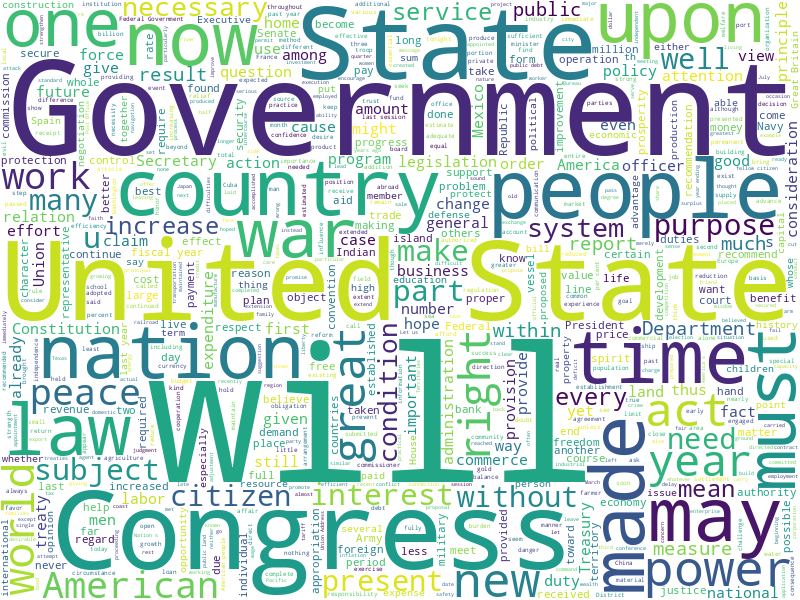

In [9]:
#@markdown 워드클라우드 시각화
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df.content.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=36, contour_color='steelblue', width = 800, height=600)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## LDA (잠재 디리클레 할당) pre-process

🔶 gensim.utils.simple_preprocess를 이용하여, document를 a list of tokens으로 변환.  
🔶 Lower case, tokenize, etc. (Optional)

In [13]:
#@markdown + Install {gensim}
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!pip install gensim

In [16]:
#@markdown + Tokenize using {gensim} simple_preprocess
import gensim
from gensim.utils import simple_preprocess
df.content = df.content.apply(simple_preprocess)

🔶 Remove stopwords: e.g., to, I, the, a, from, etc.

In [17]:
#@markdown stopwords 제거
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'to']) # add more if want
df.content = df.content.apply(lambda words: [word for word in words if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#@markdown Tokenize > Count vector (converting to BOW type corpus); Display the first 20 items
texts = df.content #Gensim에서는 토큰화된 결과를 texts로 지정해야 함
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5) #출현한 문서 빈도수가 낮거나 (문서에서 5번 이하) or 높은 단어들 (0.5 -> 50%이상) 제외
corpus = [dictionary.doc2bow(text) for text in texts] #doc2bow() >> 토큰화된 결과를 카운트 벡터, 즉 BOW형태로 변환; Gensim에서는 doc2bow()의 결과를 corpus로 지정해야 함
corpus[0][:20]

In [19]:
#@markdown + Convert the count vector form of the corpus to TF-IDF; Display the final 20 items
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf[0][-20:]

[(182, 0.11569544335266337),
 (183, 0.03345716487176589),
 (184, 0.08396611168035908),
 (185, 0.02788990694521304),
 (186, 0.061739983955738154),
 (187, 0.09888327011925634),
 (188, 0.0426229433218899),
 (189, 0.032269802228782236),
 (190, 0.048936377415776125),
 (191, 0.06453960445756447),
 (192, 0.0636122246503216),
 (193, 0.09392797157424708),
 (194, 0.10466802191811966),
 (195, 0.024934064585736864),
 (196, 0.02823446717801553),
 (197, 0.05223678000805478),
 (198, 0.061739983955738154),
 (199, 0.02928920915361219),
 (200, 0.11569544335266337),
 (201, 0.02621673039673532)]

In [20]:
#@markdown + Execute LDA(잠재 디리클레할당); Number of topics = set to 15 (display 3 to check)
from gensim import models
n_topics = 15
lda_model = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=n_topics)

#15개 중 3개만 보여주기
lda_model.print_topics()[:3]

[(0,
  '0.001*"jobs" + 0.001*"tonight" + 0.001*"tariff" + 0.001*"americans" + 0.000*"wool" + 0.000*"gold" + 0.000*"spain" + 0.000*"get" + 0.000*"mexico" + 0.000*"deficit"'),
 (1,
  '0.001*"jobs" + 0.001*"tonight" + 0.001*"americans" + 0.001*"businesses" + 0.001*"gentlemen" + 0.001*"challenge" + 0.001*"spain" + 0.000*"democracy" + 0.000*"program" + 0.000*"college"'),
 (2,
  '0.001*"programs" + 0.001*"program" + 0.001*"billion" + 0.001*"budget" + 0.001*"tonight" + 0.001*"communist" + 0.001*"inflation" + 0.001*"help" + 0.000*"cannot" + 0.000*"spending"')]

In [21]:
#@markdown Install libraries for visualization {pyLDAvis}
%%capture
!pip install pyLDAvis
!pip install "pandas<2.0.0"

## 🔶 LDA 시각화

In [22]:
#@markdown LDA결과 시각화
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.000902 -0.006354       1        1  40.525947
9      0.007835 -0.002415       2        1  19.203101
1     -0.012990 -0.002316       3        1   9.373041
14     0.003106  0.000506       4        1   9.303931
8      0.000750 -0.009151       5        1   8.866133
10    -0.001478  0.000357       6        1   5.608507
4      0.001304 -0.000303       7        1   2.160082
0     -0.001639  0.002193       8        1   1.341671
2      0.000570 -0.002474       9        1   0.882570
13     0.003287  0.000436      10        1   0.717539
12     0.000037  0.004544      11        1   0.680522
7     -0.002628  0.001342      12        1   0.460175
3      0.001127  0.006216      13        1   0.440886
6     -0.000844  0.002786      14        1   0.272329
11     0.000662  0.004634      15        1   0.163567, topic_info=            Term        Freq       Total Category  logprob  loglift
9232     tonight  220.000000  220.000000  Default  30.0000  30.0000
8394      budget  184.000000  184.000000  Default  29.0000  29.0000
8694     program  224.000000  224.000000  Default  28.0000  28.0000
7376        help  184.000000  184.000000  Default  27.0000  27.0000
3953      mexico  160.000000  160.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
7025       fight    0.186731   82.488779  Topic15  -8.1708   0.3250
458         bank    0.191652  119.312138  Topic15  -8.1447  -0.0181
475    commenced    0.182764   71.503674  Topic15  -8.1922   0.4464
253   convention    0.187894  123.511079  Topic15  -8.1645  -0.0725
5481      silver    0.186977  120.619683  Topic15  -8.1694  -0.0537

[951 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1578      1  0.343866   abuses
1578      2  0.202274   abuses
1578      3  0.101137   abuses
1578      4  0.101137   abuses
1578      5  0.080910   abuses
...     ...       ...      ...
3021      3  0.084816  younger
3021      4  0.084816  younger
3021      5  0.169631  younger
3021      6  0.056544  younger
3021      7  0.028272  younger

[5457 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 2, 15, 9, 11, 5, 1, 3, 14, 13, 8, 4, 7, 12])